In [65]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plot

In [2]:
data = pd.read_csv('input/attacks.csv', encoding = 'latin1')

## Printeamos el DataFrame para la visualización y plantear la hipotesis. 

In [3]:
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [4]:
#Miramos las columnas que tenemos en el DF
data.columns
print(data.shape)
print (data.size)

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [5]:
#Miramos el tamaño y el shape de el DF. 
print(data.shape)
print (data.size)

(25723, 24)
617352


In [6]:
#Vemos a ver cuantos estan con objetos Nulos
# Los que tenemos con Nulos los limpiaremos en un futuro
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [7]:
display(data["Activity"].value_counts())

Surfing                                                                   971
Swimming                                                                  869
Fishing                                                                   431
Spearfishing                                                              333
Bathing                                                                   162
                                                                         ... 
Free diving                                                                 1
Scuba diving                                                                1
The 426-ton cargo ship Mia, laden with cement, capsized in heavy seas       1
Surfing & filming dolphins                                                  1
Bathing close inshore                                                       1
Name: Activity, Length: 1532, dtype: int64

# Data Cleaning!! 

In [8]:
#Lo primero que hemos visto es que tanto en la columna Species como Sex, las dos tienen un espacio al final. 
#Para curarnos en salud, vamos a eliminar ese espacio del nombre. 
data.rename(columns={'Species ':'Species',
                        'Sex ':'Sex'},
               inplace=True)
data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [9]:
#Vamos a borrar todos los duplicados del DF. 
data_clean = data.drop_duplicates()
display(data_clean)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN,NaN
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,NaN,NaN
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#nullvals = data.isnull().sum()[data.isnull().sum() > 0]
#nullvals 

In [10]:
#Revisamos si se ha hecho bien la limpieza.
print(data_clean.size)
print(data_clean.shape)
data_clean.info()

151488
(6312, 24)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6312 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6310 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species              

In [11]:
#Vamos a ver que hay en las columnas "Unnamed: 22" 
data["Unnamed: 22"].isnull().value_counts() # Falso =. Verdadero = 
#display(data[data["Unnamed: 22"].notnull()])
# A no ser relevante en los datos que no son nulos, procederemos a borrar esa columna de datos. 

True     25722
False        1
Name: Unnamed: 22, dtype: int64

In [12]:
#Hacemos lo mismo con la columna 'Unnamed: 23'
data["Unnamed: 23"].isnull().value_counts()
display(data[data["Unnamed: 23"].notnull()])
# A no ser relevante en los datos que no son nulos, procederemos a borrar esa columna de datos. 

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
4415,1952.03.30,30-Mar-1952,1952.0,Unprovoked,NETHERLANDS ANTILLES,Curacao,NaN,Went to aid of child being menaced by the shark,A.J. Eggink,M,...,"Bull shark, 2.7 m [9'] was captured & dragged ...","J. Randall, p.352 in Sharks & Survival; H.D. B...",1952.03.30-Eggink.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.03.30,1952.03.30,1888.0,NaN,Teramo
5840,1878.09.14.R,Reported 14-Sep-1878,1878.0,Provoked,USA,Connecticut,"Branford, New Haven County",Fishing,Captain Pattison,M,...,NaN,"St. Joseph Herald, 9/14/1878",1878.09.14.R-Pattison.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1878.09.14.R,1878.09.14.R,463.0,NaN,change filename


In [13]:
# Borramos la columna ["Unnamed: 22"] y ["Unnamed: 23"]
data_clean = data.drop(['Unnamed: 23' , 'Unnamed: 22'] , axis = 1)
#display(data_clean)

In [14]:
#Creamos el DF que vamos a necesitar para demostrar nuestra hipotesis. 
#Dejamos algunas columnas de mas que pueden ser interesantes para llegar a otra hipotesis en el futuro. 

data_clean = data_clean[['Case Number', 'Date', 'Year', 'Type', 'Country','Activity', 'Sex', 'Fatal (Y/N)', 'Species', 'Investigator or Source', 'pdf', 'Injury']]
#display(data_clean.head(10))

In [15]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Activity                5758 non-null   object 
 6   Sex                     5737 non-null   object 
 7   Fatal (Y/N)             5763 non-null   object 
 8   Species                 3464 non-null   object 
 9   Investigator or Source  6285 non-null   object 
 10  pdf                     6302 non-null   object 
 11  Injury                  6274 non-null   object 
dtypes: float64(1), object(11)
memory usage: 2.4+ MB


In [16]:
#Con esto quitamos las filas que tengan mas del 50% de NaN
#ya que no podremos hacer nada con ellas y no es significativo
data_clean = data_clean.dropna(thresh=(data_clean.shape[1] - 6))
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6301 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Activity                5758 non-null   object 
 6   Sex                     5737 non-null   object 
 7   Fatal (Y/N)             5763 non-null   object 
 8   Species                 3464 non-null   object 
 9   Investigator or Source  6285 non-null   object 
 10  pdf                     6302 non-null   object 
 11  Injury                  6274 non-null   object 
dtypes: float64(1), object(11)
memory usage: 640.0+ KB


In [17]:
#Revisamos si se ha hecho bien la limpieza.
print(data_clean.size)
print(data_clean.shape)
data_clean.info()

75624
(6302, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6301 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Activity                5758 non-null   object 
 6   Sex                     5737 non-null   object 
 7   Fatal (Y/N)             5763 non-null   object 
 8   Species                 3464 non-null   object 
 9   Investigator or Source  6285 non-null   object 
 10  pdf                     6302 non-null   object 
 11  Injury                  6274 non-null   object 
dtypes: float64(1), object(11)
memory usage: 640.0+ KB


In [18]:
#Para saber cuantos nulos tenemos en cada una de nuestras columnas
data_clean.isnull().sum()

Case Number                  1
Date                         0
Year                         2
Type                         4
Country                     50
Activity                   544
Sex                        565
Fatal (Y/N)                539
Species                   2838
Investigator or Source      17
pdf                          0
Injury                      28
dtype: int64

## Empezamos con la limpieza de diferentes columnas


In [ ]:
''' replace('NaN' , '1905', inplace = True)'''

data_clean["Case Number"].replace('NaN' , '1905', inplace = True)
data_clean.info()

In [ ]:
data_clean.info()
data_clean.isnull().sum()


### Cambiar null por 'Unknown'

In [19]:
#Para las siguientes columnas, como dentro de nuestro DataFrame no tenemos posibilidad de saber ese dato,
# para que no nos salgan los null, los cambiaremos por 'Unknown'.
data_clean["Type"] = data_clean["Type"].fillna('Unknown')
data_clean["Country"] = data_clean["Country"].fillna('Unknown')
data_clean["Activity"] = data_clean["Activity"].fillna('Unknown')
data_clean["Sex"] = data_clean["Sex"].fillna('Unknown')
data_clean["Investigator or Source"] = data_clean["Investigator or Source"].fillna('Unknown')
data_clean["Fatal (Y/N)"] = data_clean["Fatal (Y/N)"].fillna('Unknown')
data_clean["Species"] = data_clean["Species"].fillna('Unknown')
data_clean["Injury"] = data_clean["Injury"].fillna('Unknown')

In [20]:

#Al haber unicamente dos datos con NaN, los vamos a rellenar con un 0 ya que aunq nos pueda cambiar
#la media, no va a ser significativo. 
data_clean[data_clean["Year"].isnull()]
data_clean['Year'] = data_clean['Year'].fillna(0)
pd.unique(data_clean['Year']) #Con esto vemos que todos los años estan bien y ya podemos operar con ella. 

array([2018., 2017.,    0., 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994.,
       1993., 1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986.,
       1985., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
       1975., 1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966.,
       1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957.,
       1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948.,
       1848., 1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940.,
       1939., 1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931.,
       1930., 1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922.,
       1921., 1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913.,
       1912., 1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904.,
       1903., 1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895.,
       1894., 1893.,

## Ahora vamos a ir recorriendo cada columna para limpiarla.


### Columna Year!

In [ ]:
#Para la columna CaseNumber, solo tenemos un NaN, asique usaremos la forma de datos de todos los demas registros, 
#para añadirle un valor concreto y dejar esa columna lista. 

def CaseNumber(x):
    if x == 'NaN':
        return x == '1905.09.06'
    else:
        return x
data_clean["Case Number"] = data_clean["Case Number"].apply(CaseNumber)
pd.unique(data_clean['Case Number'])

In [ ]:
data_clean[data_clean["Case Number"].isnull()]

### Columna Type!

In [21]:
#Lo vamos a añadir todo en 'Unprovoked', 'Provoked' y 'Unknown'. 
#Las inclemencias meteorologicas las cuento como 'Unprovoked'.
#Las demás, las utilizaremos como 'Unknown'

pd.unique(data_clean['Type'])
data_clean['Type'].value_counts()
def Type(x):
    if x == "Unprovoked":
        return 'Unprovoked'
    elif x == "Provoked":
        return 'Provoked'
    elif x == "Sea Disaster":
        return 'Unprovoked' 
    return 'Unknown'
data_clean['Type'] = data_clean['Type'].apply(Type)
pd.unique(data_clean['Type'])

array(['Unknown', 'Unprovoked', 'Provoked'], dtype=object)

### Columna Country

In [ ]:

print(pd.unique(data_clean['Country']).size)
pd.unique(data_clean['Country'])

In [22]:
data_clean.Country = data_clean.Country.str.replace(r"(.*)UNITED ARAB EMIRATES(.*)", 'UNITED ARAB EMIRATES')
data_clean.Country = data_clean.Country.str.replace(r"(.*)Fiji(.*)" , 'FIJI')
data_clean.Country = data_clean.Country.str.replace(r"(.*)British(.*)" , 'UK')
data_clean.Country = data_clean.Country.str.replace(r"(.*)BRITISH(.*)" , 'UK')
data_clean.Country = data_clean.Country.str.replace(r"(.*)BRITAIN(.*)" , 'UK')
data_clean.Country = data_clean.Country.str.replace(r"(.*)DIEGO GARCIA(.*)" , 'Unknown')
data_clean.Country = data_clean.Country.str.replace(r"(.*)OCEAN(.*)" , 'Unknown')
data_clean.Country = data_clean.Country.str.replace(r"(.*)SEA(.*)" , 'Unknown')
data_clean.Country = data_clean.Country.str.replace(r"(.*)Between(.*)" , 'Unknown')
data_clean.Country = data_clean.Country.str.replace(r"(.*)SRI LANKA(.*)" , 'SRI LANKA')
data_clean.Country = data_clean.Country.str.replace(r"(.*)MEXICO(.*)" , 'MEXICO')
data_clean.Country = data_clean.Country.str.replace(r"(.*)Sierra Leone(.*)" , 'SIERRA LEONE')
data_clean.Country = data_clean.Country.str.replace(r"(.*)Seychelles(.*)" , 'SEYCHELLES')


In [23]:
print(pd.unique(data_clean['Country']).size)
#pd.unique(data_clean['Country'])
pd.set_option('display.max_rows', 500)
data_clean['Country'].value_counts()


177


USA                               2229
AUSTRALIA                         1338
SOUTH AFRICA                       579
Unknown                            148
PAPUA NEW GUINEA                   134
NEW ZEALAND                        128
BRAZIL                             112
BAHAMAS                            109
MEXICO                              90
ITALY                               71
FIJI                                65
PHILIPPINES                         61
REUNION                             60
NEW CALEDONIA                       53
CUBA                                46
MOZAMBIQUE                          45
SPAIN                               44
INDIA                               40
EGYPT                               38
JAPAN                               34
CROATIA                             34
PANAMA                              32
SOLOMON ISLANDS                     30
IRAN                                29
JAMAICA                             27
GREECE                   

### Columna Fatal(Y/N)

In [ ]:
data_clean['Fatal (Y/N)'].value_counts()

In [ ]:
STOP

In [24]:
#HAcemos una funcion que nos ayude a rellenar con True False dependiendo de lo que hay. 
def fatality(x):
    if x == "Y":
        return True
    elif x == "N":
        return False
    elif x == " N":
        return False
    elif x == "N ":
        return False
    elif x == "y":
        return True
    
    return 'Unknown'
data_clean['Fatal (Y/N)'] = data_clean['Fatal (Y/N)'].apply(fatality)

In [25]:
data_clean['Fatal (Y/N)'].value_counts()

False      4301
True       1389
Unknown     612
Name: Fatal (Y/N), dtype: int64

In [26]:
#Ahora cambiamos el nombre de la columna para que no sea Y/N sino T/F
data_clean.rename(columns={'Fatal (Y/N)':'Fatal',
                    },
               inplace=True)
data_clean.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Activity', 'Sex',
       'Fatal', 'Species', 'Investigator or Source', 'pdf', 'Injury'],
      dtype='object')

## Pizza o pierna, que prefieren il tiburoni?

In [49]:
#Para empezar a plantear nuestra hipotesis y no seguir limpiando de gratis, 
#vamos a crear nuestra tabla con los ataques producidos en Italia. 
italia = data_clean[(data_clean["Country"]== "ITALY")]
data_italy = italia[["Country", "Year", "Type", "Injury", "Fatal"]]
data_italy = data_italy.reset_index(drop=True)
display(data_italy['Injury'])


0     FATAL, but shark involvement prior to death un...
1              Lower left leg injured PROVOKED ACCIDENT
2                                                 FATAL
3                                No Injury to occupants
4                                No Injury to occupants
5     No injury; no attack, shark ate the bait hangi...
6                   No Injury to occupant; canoe bitten
7                              Upper right thigh bitten
8                         FATAL. His body not recovered
9                                              Survived
10                                            No injury
11                               Contusion of left foot
12                                            No injury
13    No injury, 3 m shark "harassed" him at depth o...
14                                           No details
15                                            No injury
16                                            No injury
17               No injury, white shark struck p

In [50]:
#Creo una tabla de Injury2 para poder trabajar en ella y organizar todo sin perder info
data_italy['Injury2'] = data_italy['Injury']

In [51]:
data_italy.columns

Index(['Country', 'Year', 'Type', 'Injury', 'Fatal', 'Injury2'], dtype='object')

In [35]:
#Para saber el menu de los tiburones tenemos que depurar la columna Injury. 
#Vamos a agrupar todo en tres columnas LEGS, RIBS,  ARMS y FATAL
'''data_italy.Injury2 = data_italy.Injury2.str.replace(r"(.*)no injury(.*)" , 'NO INJURY')
data_italy.Injury2 = data_italy.Injury2.str.replace(r"(.*)No injury(.*)" , 'NO INJURY')
data_italy.Injury2 = data_italy.Injury2.str.replace(r"(.*)No Injury(.*)" , 'NO INJURY')
data_italy.Injury2 = data_italy.Injury2.str.replace(r"(.*)leg(.*)" , 'LEG')
data_italy.Injury2 = data_italy.Injury2.str.replace(r"(.*)LEG(.*)" , 'LEG')
data_italy.Injury2 = data_italy.Injury2.str.replace(r"(.*)foot(.*)" , 'LEG')
data_italy.Injury2 = data_italy.Injury2.str.replace(r"(.*)FOOT(.*)" , 'LEG')
data_italy.Injury2 = data_italy.Injury2.str.replace(r"(.*)Foot(.*)" , 'LEG')
data_italy.Injury2 = data_italy.Injury2.str.replace(r"(.*)BODY(.*)" , 'FATAL')
data_italy.Injury2 = data_italy.Injury2.str.replace(r"(.*)body(.*)" , 'FATAL')
data_italy.Injury2 = data_italy.Injury2.str.replace(r"(.*)FATAL(.*)" , 'FATAL')
data_italy.Injury2 = data_italy.Injury2.str.replace(r"(.*)Ribs(.*)" , 'RIBS')
data_italy.Injury2 = data_italy.Injury2.str.replace(r"(.*)ribs(.*)" , 'RIBS')
data_italy.Injury2 = data_italy.Injury2.str.replace(r"(.*)arms(.*)" , 'ARMS')
data_italy.Injury2 = data_italy.Injury2.str.replace(r"(.*)ARMS(.*)" , 'ARMS')
data_italy.Injury2 = data_italy.Injury2.str.replace(r"(.*)Arms(.*)" , 'ARMS')
data_italy.Injury2 = data_italy.Injury2.str.replace(r"(.*)arms(.*)" , 'ARMS')'''


In [53]:
import re
#arms = ['arms' , 'hand', 'hands', 'arms']
arms = ["(.*)?arms(.*)?", "(.*)?hand(.*)?" ]
#leg = ['leg', 'legs', 'foot']
leg = ["(.*)leg(.*)?", "(.*)?foot(.*)?" ]
#fatal = ['fatal', 'Body']
fatal = ["(.*)?atal(.*)?", "(.*)?ody(.*)?" ]
ribs = ["(.*)?ribs(.*)?"]
noinjury = ["(.*)?o injur(.*)?"]

def menu (x) :
    Arms = "ARMS"
    Leg = 'LEGS'
    Fatal = 'FATAL'
    Ribs = 'RIBS'
    Noinjury = 'NO INJURY'
    x = x.lower()
    if type(x) != str:
        return 'Unknown'
    else:
        for a in arms:
            if re.search (a,x):
                x = Arms
                return x
        for l in leg:
            if re.search (l,x):
                x = Leg
                return x
        for i in fatal:
            if re.search (i,x):
                x = Fatal
                return x 
        for r in ribs:
            if re.search (r,x):
                x = Ribs
                return x
        for n in noinjury:
            if re.search (n,x):
                x = Noinjury
                return x
        return 'Unknown'
    
data_italy['Injury2'] = data_italy['Injury2'].apply(menu)
        

In [54]:
data_italy[['Injury' , 'Injury2']]

,Injury,Injury2
0,"FATAL, but shark involvement prior to death un...",FATAL
1,Lower left leg injured PROVOKED ACCIDENT,LEGS
2,FATAL,FATAL
3,No Injury to occupants,NO INJURY
4,No Injury to occupants,NO INJURY
5,"No injury; no attack, shark ate the bait hangi...",NO INJURY
6,No Injury to occupant; canoe bitten,NO INJURY
7,Upper right thigh bitten,Unknown
8,FATAL. His body not recovered,FATAL
9,Survived,Unknown


In [56]:
display(data_italy)

,Country,Year,Type,Injury,Fatal,Injury2
0,ITALY,2015.0,Unknown,"FATAL, but shark involvement prior to death un...",Unknown,FATAL
1,ITALY,2012.0,Provoked,Lower left leg injured PROVOKED ACCIDENT,Unknown,LEGS
2,ITALY,2006.0,Unprovoked,FATAL,True,FATAL
3,ITALY,2001.0,Unknown,No Injury to occupants,False,NO INJURY
4,ITALY,1999.0,Unknown,No Injury to occupants,False,NO INJURY
5,ITALY,1998.0,Unknown,"No injury; no attack, shark ate the bait hangi...",Unknown,NO INJURY
6,ITALY,1991.0,Unknown,No Injury to occupant; canoe bitten,False,NO INJURY
7,ITALY,1989.0,Unprovoked,Upper right thigh bitten,False,Unknown
8,ITALY,1989.0,Unprovoked,FATAL. His body not recovered,True,FATAL
9,ITALY,1988.0,Unprovoked,Survived,False,Unknown


In [57]:
data_italy['Injury2'].value_counts()


NO INJURY    24
Unknown      21
FATAL        14
LEGS          6
ARMS          5
RIBS          1
Name: Injury2, dtype: int64

In [61]:
pizza = ["(.*)?no injury(.*)?" ]
human = ["(.*)?fatal(.*)?", "(.*)?legs(.*)?", "(.*)?arms(.*)?", "(.*)?ribs(.*)?"]

def pizzavshuman (x):
    Pizza = 'PIZZA'
    Human = 'HUMAN'
    x = x.lower()
    for p in pizza:
        if re.search (p,x):
            x = Pizza
            return x
    for h in human:
        if re.search (h,x):
            x = Human
            return x
    return 'UNKNOWN'

data_italy['Pizza vs Human'] = data_italy['Injury2'].apply(pizzavshuman)

In [62]:
display(data_italy)

,Country,Year,Type,Injury,Fatal,Injury2,Pizza vs Human
0,ITALY,2015.0,Unknown,"FATAL, but shark involvement prior to death un...",Unknown,FATAL,HUMAN
1,ITALY,2012.0,Provoked,Lower left leg injured PROVOKED ACCIDENT,Unknown,LEGS,HUMAN
2,ITALY,2006.0,Unprovoked,FATAL,True,FATAL,HUMAN
3,ITALY,2001.0,Unknown,No Injury to occupants,False,NO INJURY,PIZZA
4,ITALY,1999.0,Unknown,No Injury to occupants,False,NO INJURY,PIZZA
5,ITALY,1998.0,Unknown,"No injury; no attack, shark ate the bait hangi...",Unknown,NO INJURY,PIZZA
6,ITALY,1991.0,Unknown,No Injury to occupant; canoe bitten,False,NO INJURY,PIZZA
7,ITALY,1989.0,Unprovoked,Upper right thigh bitten,False,Unknown,UNKNOWN
8,ITALY,1989.0,Unprovoked,FATAL. His body not recovered,True,FATAL,HUMAN
9,ITALY,1988.0,Unprovoked,Survived,False,Unknown,UNKNOWN


In [80]:
display(data_italy['Pizza vs Human'].value_counts())

HUMAN      26
PIZZA      24
UNKNOWN    21
Name: Pizza vs Human, dtype: int64

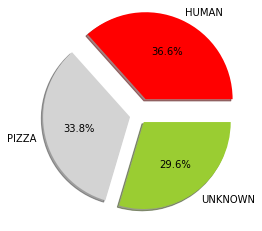

In [81]:
x = list(data_italy['Pizza vs Human'].value_counts())
labels = pd.unique(data_italy['Pizza vs Human'])
#print(labels)
colors = [ 'red' , 'lightgray', 'yellowgreen'] 
#La bandera de italia en honor a nuestra hipotesis. Aunq metemos gris claro en vez de blanco 
PizzaGrafico = plot.pie(x, labels=labels,colors=colors, shadow=True, explode=(0.2,0.1,0.1),
        autopct='%1.1f%%')
plot.show(PizzaGrafico)